In [186]:
# 1: Reading csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import RandomForestRegressor
import pymcmcstat
import matplotlib.pyplot as plt

df = pd.read_csv('imdb_top_2000_movies.csv')


In [187]:
import warnings
warnings.filterwarnings("ignore")

In [188]:
# 2: Genre One Hot Encoding
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(df['Genre'].str.split(', '))
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)
df_encoded = pd.concat([df, genres_df], axis=1)

df_encoded.drop(columns=['Genre'], inplace=True)
print(genres_df.columns)

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western'],
      dtype='object')


In [189]:
# 3: Test and Training Set Split
X = df_encoded[genres_df.columns.to_list()]
y = df_encoded['IMDB Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=210)
print(X_train.columns)

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western'],
      dtype='object')


In [190]:
# 4: Simple Linear Reg Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [191]:
# Evaluate the model
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': regressor.coef_})
print(coefficients)

Mean Squared Error: 0.7498255960453257
        Feature  Coefficient
0        Action    -0.402529
1     Adventure    -0.098391
2     Animation     0.479207
3     Biography     0.076321
4        Comedy    -0.397280
5         Crime    -0.045424
6   Documentary     0.025936
7         Drama     0.371840
8        Family    -0.319069
9       Fantasy    -0.225759
10    Film-Noir     0.668115
11      History    -0.119954
12       Horror    -0.495382
13        Music    -0.490571
14      Musical     0.138269
15      Mystery    -0.113684
16      Romance    -0.275872
17       Sci-Fi    -0.179411
18        Sport    -0.307090
19     Thriller    -0.107048
20          War     0.383016
21      Western     0.488075


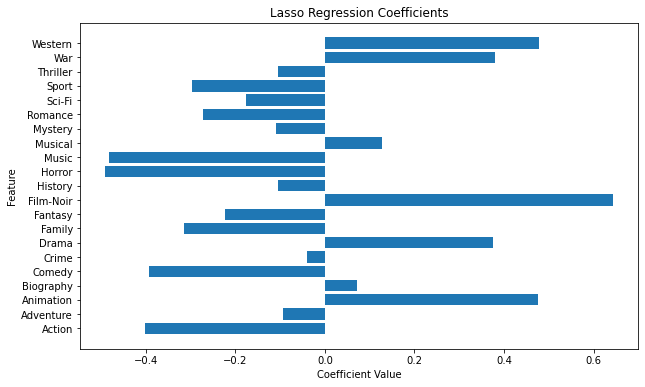

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')


In [192]:
# 5: Lasso Reg for Feature Selection
from sklearn.linear_model import LassoCV
import numpy as np

lasso = LassoCV(cv=10)
lasso.fit(X_train, y_train)

selected_features = X.columns[lasso.coef_ != 0]
coefficients = lasso.coef_[lasso.coef_ != 0]

plt.figure(figsize=(10, 6))
plt.barh(selected_features, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Lasso Regression Coefficients')
plt.show()
print(selected_features)


In [193]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
df_enc = df_encoded.dropna()
X1 = df_enc
X1['Gross'] = X1['Gross'].str.replace('$', '').str.replace('M', '').astype(float)
X1['Votes'] = X1['Votes'].str.replace(',', '').astype(float)
y1 = df_enc['IMDB Rating']  

# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=210)
y1_train.tolist()


[6.5,
 7.1,
 7.1,
 7.3,
 8.0,
 7.3,
 5.9,
 6.6,
 6.7,
 6.2,
 6.7,
 8.0,
 7.1,
 5.3,
 6.4,
 7.2,
 8.4,
 5.8,
 5.8,
 6.4,
 6.5,
 7.0,
 6.3,
 7.9,
 6.7,
 5.7,
 7.6,
 6.8,
 6.9,
 7.2,
 6.9,
 6.5,
 7.7,
 7.4,
 7.0,
 7.5,
 7.6,
 7.1,
 6.6,
 6.1,
 8.0,
 7.5,
 7.2,
 6.6,
 7.5,
 6.7,
 7.9,
 6.2,
 7.9,
 5.8,
 7.0,
 7.2,
 7.3,
 7.4,
 6.9,
 5.1,
 6.0,
 7.3,
 5.9,
 6.8,
 6.6,
 7.1,
 6.2,
 7.4,
 8.4,
 7.4,
 6.6,
 6.6,
 5.7,
 7.3,
 6.8,
 6.0,
 7.8,
 8.2,
 9.0,
 7.0,
 7.0,
 7.4,
 7.0,
 6.4,
 8.0,
 8.6,
 6.6,
 7.7,
 9.2,
 6.3,
 4.8,
 5.8,
 4.5,
 6.7,
 7.2,
 8.3,
 7.0,
 4.6,
 7.2,
 6.4,
 6.3,
 6.7,
 7.6,
 6.2,
 7.2,
 6.2,
 5.5,
 6.6,
 8.0,
 6.5,
 8.5,
 5.3,
 7.2,
 6.3,
 6.0,
 6.7,
 7.8,
 7.0,
 6.4,
 5.9,
 6.1,
 6.1,
 8.3,
 5.4,
 7.5,
 4.5,
 6.8,
 7.7,
 6.5,
 8.1,
 7.5,
 6.2,
 7.3,
 7.4,
 7.3,
 5.9,
 6.6,
 6.8,
 6.0,
 6.6,
 6.2,
 7.8,
 6.6,
 6.7,
 5.7,
 7.6,
 8.0,
 5.8,
 6.7,
 8.0,
 6.0,
 6.2,
 6.4,
 6.7,
 7.8,
 8.0,
 7.8,
 8.1,
 7.7,
 5.8,
 5.8,
 7.1,
 7.2,
 7.0,
 7.3,
 7.2,
 8.6,
 6.2,
 7.7,
 6.3,
 8.0

In [194]:
numeric_features = ['Duration', 'Votes', 'Gross']
categorical_features = selected_features.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', 'passthrough', categorical_features)
    ])

# Bayesian Ridge regression model in a pipeline with the preprocessor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', BayesianRidge())
])
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Duration', 'Votes',
                                                   'Gross']),
                                                 ('cat', 'passthrough',
                                                  ['Action', 'Adventure',
                                                   'Animation', 'Biography',
                                                   'Comedy', 'Crime', 'Drama',
                                                   'Family', 'Fantasy',
                                                   'Film-Noir', 'History',
                                                   'Horror', 'Music', 'Musical',
                                                   'Mystery', 'Romance',
                                                   'Sci-Fi', 'Sport',
                                                   'Thriller', 'War',
               

In [195]:
X1_train.drop(['Movie Name', 'Release Year', 'IMDB Rating', 'Metascore', 'Director', 'Cast'], axis = 1)
X1_train.reset_index(drop=True, inplace=True)


In [196]:
# Fit the model to the training data
model.fit(X1_train, y1_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Duration', 'Votes',
                                                   'Gross']),
                                                 ('cat', 'passthrough',
                                                  ['Action', 'Adventure',
                                                   'Animation', 'Biography',
                                                   'Comedy', 'Crime', 'Drama',
                                                   'Family', 'Fantasy',
                                                   'Film-Noir', 'History',
                                                   'Horror', 'Music', 'Musical',
                                                   'Mystery', 'Romance',
                                                   'Sci-Fi', 'Sport',
                                                   'Thriller', 'War',
               

In [197]:
# Predict on the test data
y1_pred = model.predict(X1_test)
X1_test.reset_index(drop=True, inplace=True)
print(X1_test, y1_pred)



                       Movie Name Release Year  Duration  IMDB Rating  \
0        The Emperor's New Groove         2000        78          7.4   
1                    Just My Luck         2006       108          5.4   
2    Guess Who's Coming to Dinner         1967       108          7.8   
3                      Aquamarine         2006       110          5.4   
4               Snakes on a Plane         2006       105          5.5   
..                            ...          ...       ...          ...   
369                      Mallrats         1995        94          7.0   
370        Lars and the Real Girl         2007       106          7.3   
371                            Go         1999       102          7.2   
372                         Signs         2002       106          6.8   
373           Singin' in the Rain         1952       103          8.3   

     Metascore     Votes                   Director               Cast  \
0         70.0  224302.0                Mark Dind

In [198]:
# Evaluate the model
# For example, you can use mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y1_test, y1_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.5285881532567144


In [199]:
res = pd.DataFrame({'Predicted': y1_pred, 'Actual': X1_test['IMDB Rating']})
print(res)

     Predicted  Actual
0     7.014700     7.4
1     6.251402     5.4
2     6.877414     7.8
3     6.353921     5.4
4     6.433343     5.5
..         ...     ...
369   6.569110     7.0
370   6.928989     7.3
371   6.673015     7.2
372   6.880175     6.8
373   6.873940     8.3

[374 rows x 2 columns]


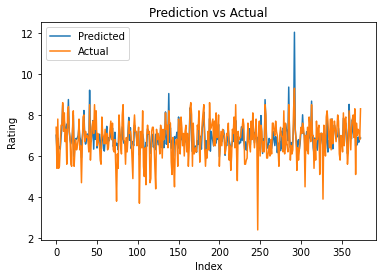

In [200]:
xax = res.index.to_numpy()
y1ax = res['Predicted'].to_numpy()
y2ax = res['Actual'].to_numpy()
plt.plot(xax, y1ax, label ='Predicted')
plt.plot(xax, y2ax, '-', label ='Actual')

plt.xlabel("Index")
plt.ylabel("Rating")
plt.legend()
plt.title('Prediction vs Actual')
plt.show()